<a href="https://colab.research.google.com/github/msfancypants07/Computer-Vision-Projects/blob/projects/Copy_of_Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Start with our usual setup, including the utility methods from last time.

In [ ]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
from time import time

# Make matplotlib figures appear inline in the
# notebook rather than in a new window
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# provide methods for loading and displaying images
def load(image_path):
    out = io.imread(image_path)
    out = out.astype(np.float64) / 255
    return out

def display(img, title=None):
    # Show image
    plt.figure(figsize = (5,5))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# As usual, you may use your own images, but you must include them in your submission.
image_path = './sample_data/dog.jpg'

dog = load(image_path)

We provide a naive implementation of a grayscale convolutional filter:

In [ ]:
import math
def naive_convolution_filter(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    image_c = image.copy()
    out = np.zeros(image_c.shape)

    for image_row in range(image_c.shape[0]):
        for image_column in range(image_c.shape[1]):
            output_value = 0
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)

                    if (image_row + image_row_offset < 0 or
                        image_row + image_row_offset >= image_c.shape[0] or
                        image_column + image_column_offset < 0 or
                        image_column + image_column_offset >= image_c.shape[1]):
                        image_value = 0
                    else:
                        image_value = image_c[image_row + image_row_offset, image_column + image_column_offset]

                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value

    return out

In [ ]:
def rgb_exclusion(image, channel1, channel2):
  image_copy = image.copy()
  # exclude first color channel
  if channel1 == 'R' or channel2 == 'R':
    image_copy[:, :, 0] /= 2
  if channel1 == 'G' or channel2 == 'G':
    image_copy[:, :, 1] /= 2
  if channel1 == 'B' or channel2 == 'B':
    image_copy[:, :, 2] /= 2
  # exclude second color channel

  out = image_copy
  return out

## Exercise 1

1. Take a look at the filters in the following code cell. What do you think they do? You may want to run display() on the filter to visualize it.
2. Run the filters using `naive_convolution_filter` to verify your answer.

In [ ]:
filter1 = np.array(
[
    [0,0,0,0,0],
    [0,0,0,0,0],
    [0,0,0,0,1],
    [0,0,0,0,0],
    [0,0,0,0,0]
])

filter2 = np.array(
[
    [0,0,0],
    [0,2,0],
    [0,0,0]
])

filter4 = np.array(
[
    [0.1,0.1,0.1],
    [0.1,0.2,0.1],
    [0.1,0.1,0.1]
])

# Hint: check the lecture slides for a familiar-looking filter
filter3 = np.array(
[
    [-.11,-.11,-.11],
    [-.11,1.88,-.11],
    [-.11,-.11,-.11],
])
# naive_convolution_filter(dog, filter2)

## Exercise 2
So far, we've only run the naive implementation on a grayscale image. Add a color image of your choice and run a filter on it, showing both the original image and the output of the filter.

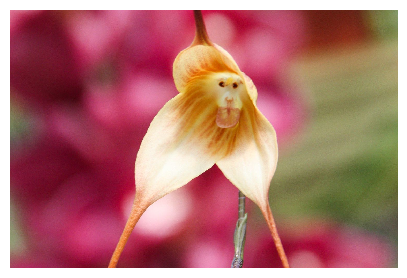

In [ ]:
flower = load('sample_data/flower.jpg')
flower_c = flower.copy()
display(flower_c)
# filtered_flower = naive_convolution_filter(flower_c, filter2)

As you can see, the filter runs on all three channels. Create an implementation that allows applying different filters to each channel.

In [ ]:
# olivers
def filter_channel(image, filterA, filterB, filterC):
  image_c = image.copy()

  image_c[...,0] = naive_convolution_filter(image[...,0], filterA)
  image_c[...,1] = naive_convolution_filter(image[...,1], filterB)
  image_c[...,1] = naive_convolution_filter(image[...,2], filterC)

  return image_c

 Using only your implementation and the provided filters, produce an image that is tinted red.

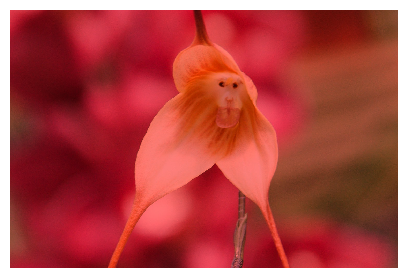

KeyboardInterrupt: ignored

In [ ]:
flower_c1 = flower.copy()
flower_red = rgb_exclusion(flower, 'B', 'G')
display(flower_red)
f_filter = naive_convolution_filter(flower_red, filter2)
display(f_filter)

Run filter #3 on the red and green channels, and filter #1 on the blue channel. Explain why the resulting image looks the way it does.

In [ ]:
flower_filtered = filter_channel(flower, filter3, filter3, filter1)
display(flower_filtered)

## Exercise 3
Create your own filter(s) and describe their output.

In [ ]:
def filter_blue(image):
  image_c = image.copy()
  filter_channel(image_c, filter3, filter2, filter3)

In [ ]:
flower_blue = filter_blue(flower)

## Advanced exercise 1

Recall from lecture that at the edges, filters only partially overlap with the image pixels, so we need a way to provide numbers that are out of bounds. The provided implementation uses the strategy we discussed in lecture, zero-padding, which just treats all out-of-bounds pixels as zero.

A different strategy is edge value replication: treat all out-of-bounds pixels as having the same value as the closest in-bounds pixel. Another one is mirror extension: treat the border of the image as a mirror, and use the pixel value that would be reflected into the out-of-bounds space. These are not the only strategies -- you're welcome to research others on your own.

Modify naive_convolutional_filter to implement one or more of these strategies. How does that change the output of filters?

In [ ]:
def naive_convolution_filter2(image, kernel):
    """
    Args:
        image: numpy array of shape (Hi, Wi).
        kernel: numpy array of shape (Hk, Wk).
    Returns:
        out: numpy array of shape (Hi, Wi).
    """
    image_c = image.copy()
    out = np.zeros(image_c.shape)

    for image_row in range(image_c.shape[0]):
        for image_column in range(image_c.shape[1]):
            output_value = 0
            for kernel_row in range(kernel.shape[0]):
                for kernel_column in range(kernel.shape[1]):
                    image_row_offset = math.ceil(kernel_row - kernel.shape[0] / 2)
                    image_column_offset = math.ceil(kernel_column - kernel.shape[1] / 2)

                    row = image_row + image_row_offset
                    col = image_column + image_column_offset

                    if row < 0: # too far above
                        row = 0
                    elif row >= image_c.shape[0]: # too far below
                        row = image_c.shape[0] - 1
                    if col < 0: # too far left
                        col = 0
                    elif col >= image_c.shape[1]: # too far right
                        col = image_c.shape[1] - 1

                    image_value = image_c[row, col]

                    output_value += image_value * kernel[kernel_row, kernel_column]

            out[image_row, image_column] = output_value

    return out

In [ ]:
dog_lineart = load('./sample_data/dog_lineart.jpg')
dog_lineart.shape

In [ ]:
test = naive_convolution_filter2(dog_lineart, filter4)

In [ ]:
display(test)

## Advanced exercise 2

You may have noticed that `naive_convolutional_filter` is quite slow. Create an implementation that is faster, using the `time` library to demonstrate the difference in performance. Your implementation must return the same output as the naive implementation.


In [ ]:
import cv2
from scipy.ndimage import convolve
from numpy import newaxis

def multi_convolver(image, kernel):
    B, G, R = cv2.split(image)

    kernel3d = kernel[..., newaxis]
    # B_p = np.pad(B, pad_width=1, mode='edge')
    # G_p = np.pad(G, pad_width=1, mode='edge')
    # R_p = np.pad(R, pad_width=1, mode='edge')

    img_1 = convolve(image, kernel3d, mode='nearest')

    # B_1 = convolve2d(B_p, kernel, 'same', boundary = 'fill', fillvalue = 0)
    # G_1 = convolve2d(G_p, kernel, 'same', boundary = 'fill', fillvalue = 0)
    # R_1 = convolve2d(R_p, kernel, 'same', boundary = 'fill', fillvalue = 0)

    # image_c = cv2.merge((B_1, G_1, R_1))
    return img_1


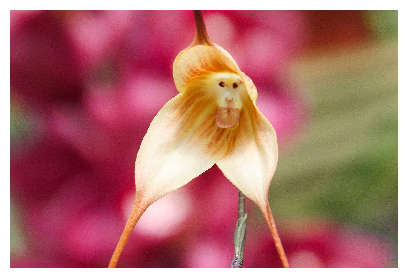

total time:  43.12851572036743


In [ ]:
start = time.time()
old = naive_convolution_filter(flower, filter3)
display(old)
end = time.time()
print("total time: ", end - start)

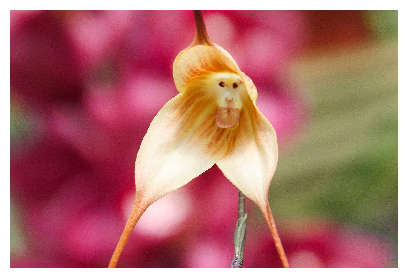

total time:  0.32576990127563477


In [ ]:
start2 = time.time()
fast = multi_convolver(flower, filter3)
display(fast)
end2 = time.time()
print("total time: ", end2 - start2)